In [21]:
!pip install numpy scikit-learn matplotlib joblib

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Fix the seed so we can repeate the same example with the same random data

In [3]:
np.random.seed(42)

In [52]:
def generate_data(size, noise_level):
#    data = np.array([[n, n*n] for n in range(size)], dtype='float32')
#    print(data)
#    tr = np.transpose(data)
#    print(tr)
#    X = tr[0].reshape((-1, 1))
    X = np.arange(size).reshape((-1, 1))
    noise = noise_level * (np.random.rand(size)-0.5)
    # print(noise)
    y = np.arange(size) * np.arange(size)
    return X, y + noise

In [ ]:
size = 300
X, y = generate_data(size, noise_level = 100)
#print(X)
#print(y)

Show the data points with potential linear models

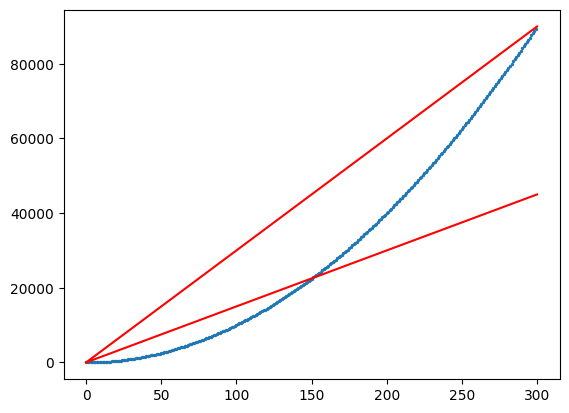

In [58]:
plt.scatter(X.transpose()[0], y, s=2);
plt.plot([0, size], [0, size*size], color="red");
plt.plot([0, size], [0, size*size/2], color="red");

## Split the Dataset With train_test_split

* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [Stratified sampling](https://en.wikipedia.org/wiki/Stratified_sampling)
* [RealPython - Split Your Dataset With scikit-learn's train_test_split()](https://realpython.com/train-test-split-python-data/)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
print('train coefficient of determination:', model.score(x_train, y_train))
print('test coefficient of determination:', model.score(x_test, y_test))

train coefficient of determination: 0.9403523899596257
test coefficient of determination: 0.9274543024511271


In [ ]:
model.predict([[6], [-3], [20]])

In [16]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X)
X = transformer.transform(X)

In [20]:
# The same in a oneilner
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
#print(X)

/home/gabor/venv/lib/python3.13/site-packages/sklearn/preprocessing/_polynomial.py:547: RuntimeWarning: overflow encountered in multiply
  np.multiply(


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [18]:
model = LinearRegression().fit(x_train, y_train)

In [19]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9218892693663802
